<a href="https://colab.research.google.com/github/VGuerrero07/Data_Science/blob/master/Machine_Learning_for_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

According to [Shift Processing](https://shiftprocessing.com/credit-card-fraud-statistics/), $24.26 Billion was lost worldwide due to payment card fraud in 2018, ranked #1 in the ranking of all theft frauds. In total (according to another source, [SumUP](https://sumup.com/blog/credit-card-fraud-detection/)), a total of 14.4 million people in the US were victims of this crime in the same year.

Therefore, this raises the attention of many financial companies and newborn *fintechs*. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase, what may not only rise their NPS and customer satisfaction, but also saving them huge amouts of money.

<p align=center>
<img src=https://www.chango.ca/wp-content/uploads/2019/07/credit-card-fraud-670x335.jpg width=60%></p>


For all of the reasons pointed above, **Artificial Intelligence** is rising as one of the top investment areas in these companies for detecting frauds, as it enables great precision for recognition of patterns and enables digital businesses to quickly detect automated and increasingly complex fraud attempts. Hence, it is a great opportunity for applying ***Data Science*** and learn from it!

In this project, my main objective is to build different machine learning models that can be used in credit card fraud detection, aiming to get the best possible results.



## Credit Card Frauds Definition

For a matter of curiosity and documentation, let's define what a credit card fraud is.

According to the [FBI](https://www.fbi.gov/scams-and-safety/common-scams-and-crimes/credit-card-fraud#:~:text=Credit%20card%20fraud%20is%20the,in%20an%20identity%20theft%20scheme.), credit card fraud is "the **unauthorized use of a credit or debit card**, or similar payment tool (ACH, EFT, recurring charge, etc.), to **fraudulently obtain money or property**. Credit and debit card numbers can be stolen from unsecured websites or can be obtained in an identity theft scheme".

## The Dataset

The Dataset used in this project was provided by [Kaggle](https://www.kaggle.com/), an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

### Dataset characteristcs

The dataset contains transactions made by credit cards in September 2013 by European cardholders, with 492 frauds detected in almost 290 thousand transactions.

Another interesting fact noticed in this dataset is the utilization of PCA (Principal Component Analysis), a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. This was performed because banks can't share sensible data from their clients.

In this case, Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.  

## Importing the Data

The first section of this project is importing the data as a DataFrame. The csv file address is indicated as `file_path`, and can be accessed [here](https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1).

To import the data and to create a Mchine Learnign algorithm, the relevant Python libraries must be ínstalled/imported first.

After importing the relevant libraries, the file can be read using `read_csv`.

In [1]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [2]:
# importing relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scikitplot as skplt

# import scikit learn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score

from imblearn.under_sampling import RandomUnderSampler

# setting graphic style
sns.set_style('dark')

In [3]:
file_path = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'

df = pd.read_csv(file_path)

# checking the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Looking at the first 5 rows, we can see the PCA variables. Also, we can confirm that features `Time` and `Amount` were not transformed.

## Analyzing the Data

In this section, the main objective is to make a brief nalysis of the dataset. 

* We can see the effect of PCA after looking at the first 5 rows of the dataset; after the transformation, the features become descharacterized (anonymous) and with numerical values. To read more about PCA, [click here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

* Features `Time` e `Amount` still maintain their original values.

* Our target variable is in column `Class`, where:
    * **0:** Normal transaction; and
    * **1:** Fraudulent Transaction;

In [4]:
# getting number of rows and columns
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

print(f'There are {df.isnull().sum().max()} missing values.')

# get statistical summary

df.describe()

The dataset has 284807 rows and 31 columns.
There are 0 missing values.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can see that there are almost 285,000 transactions in the dataset, as well as 31 columns.

Using the method `describe`, we can see that there are no big discrepancies between the variables that were transformed with PCA. Also, nothing unusual can be found in the column `Time`.

Also, it is possible to see that 75% of the transaction values (of both classes) are below 77.165 (third quartile), indicating that the vast majority of transactions have low values. The mean value observed is 88.34, the median is 22.00, and the standard deviation is 250.12.

As for the quality of the dataset, we see that there are no missing values, a common feature for many Kaggle datasets: they are already pre-processed by some users before public release.

### Data Balance

One thing that caught my eye was in the dataset [description](https://www.kaggle.com/mlg-ulb/creditcardfraud): the entries classified as fraudulent are just 0.17% of all entries. This can be seen in the bar chart below, and indicates that this dataset is highly unbalanced; therefore, some **sampling** is needed before our Machine Learning algorithm.

0    284315
1       492
Name: Class, dtype: int64
Frauds represent 0.1727 % of the dataset.


[]

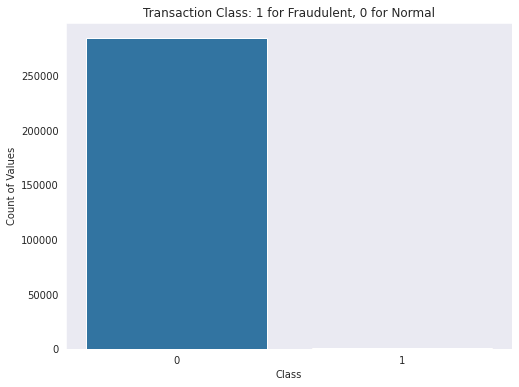

In [5]:
print(df.Class.value_counts())
print(f'Frauds represent {df[df.Class==1].shape[0]/df.shape[0] * 100:.4f} % of the dataset.')

# plot bar chart
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x='Class', ax=ax, data=df)
ax.set_title('Transaction Class: 1 for Fraudulent, 0 for Normal')
ax.set_ylabel('Count of Values')
plt.plot()

### Transactions across `Time`

Also, let's plot other charts to analyze the influence of feature `Time`. According to the dataset description, it represents the time in seconds elapsed between each transaction and the first transaction of the dataset.

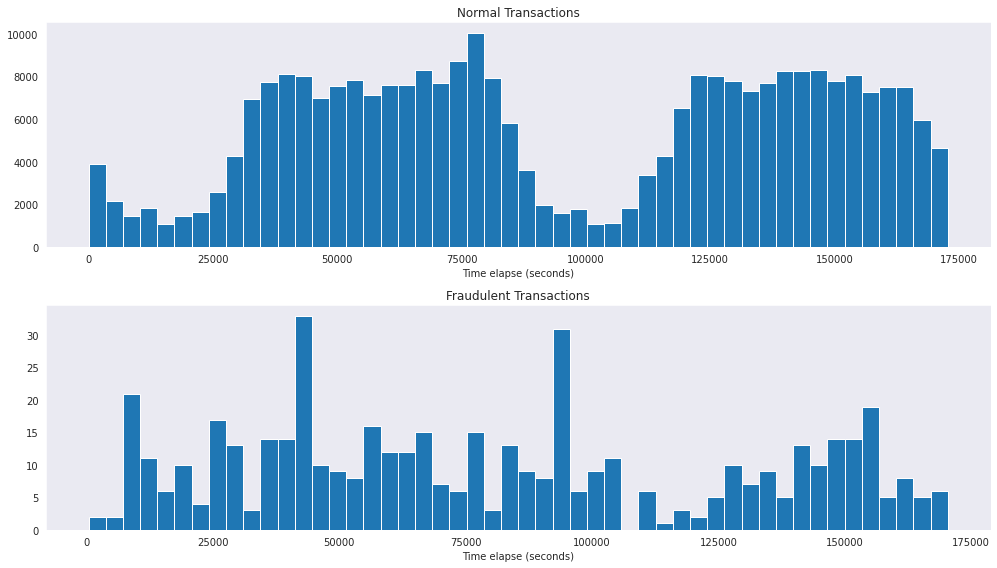

In [6]:
fig, ax = plt.subplots(nrows=2, figsize=(14,8), ncols=1)

ax[0].hist(df.Time[df.Class == 0], bins=50)
ax[1].hist(df.Time[df.Class == 1], bins=50)

ax[0].set_title("Normal Transactions")
ax[1].set_title("Fraudulent Transactions")
ax[0].set_xlabel("Time elapse (seconds)")
ax[1].set_xlabel("Time elapse (seconds)")


plt.tight_layout()
plt.show()

Looking at the charts above, we cannot find any visible patterns between the number of transactions and the time elapsed. 

### Boxplots of `Amount`

Now, it is time for the feature `Amount`. To analyze it, I am going to plot Boxplots. Boxplots are great for viewing a clear summary of one or more sets of data.

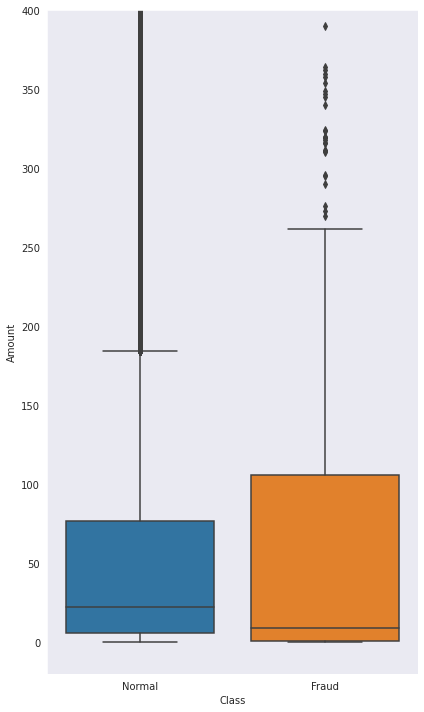

In [7]:
fig, ax = plt.subplots(figsize=(6, 10), sharex=True)

sns.boxplot(df.Class, df.Amount, ax=ax)

plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraud'])

plt.tight_layout()

We can confirm that the vast majority of transactions, Normal or Fraudulent, is a low amount transaction. Also, the boxplot is great for confirming the presence of outliers.

Usually, processing and treating outliers are both actions to be taken before the statistical analysis of the data. However, as the main goal of this project is to create a Machine Learning algorithm to detect frauds in credit card transactions, deleting outliers or not considering them is not a good choice.

### Density Plot

A density plot is a representation of the distribution of a numeric variable. It is a smoothed version of the histogram and is used in the same concept.

In this project, the density plot of the 28 PCA-transformed features is used to have a better visualization for detecting any anomaly amongst them.

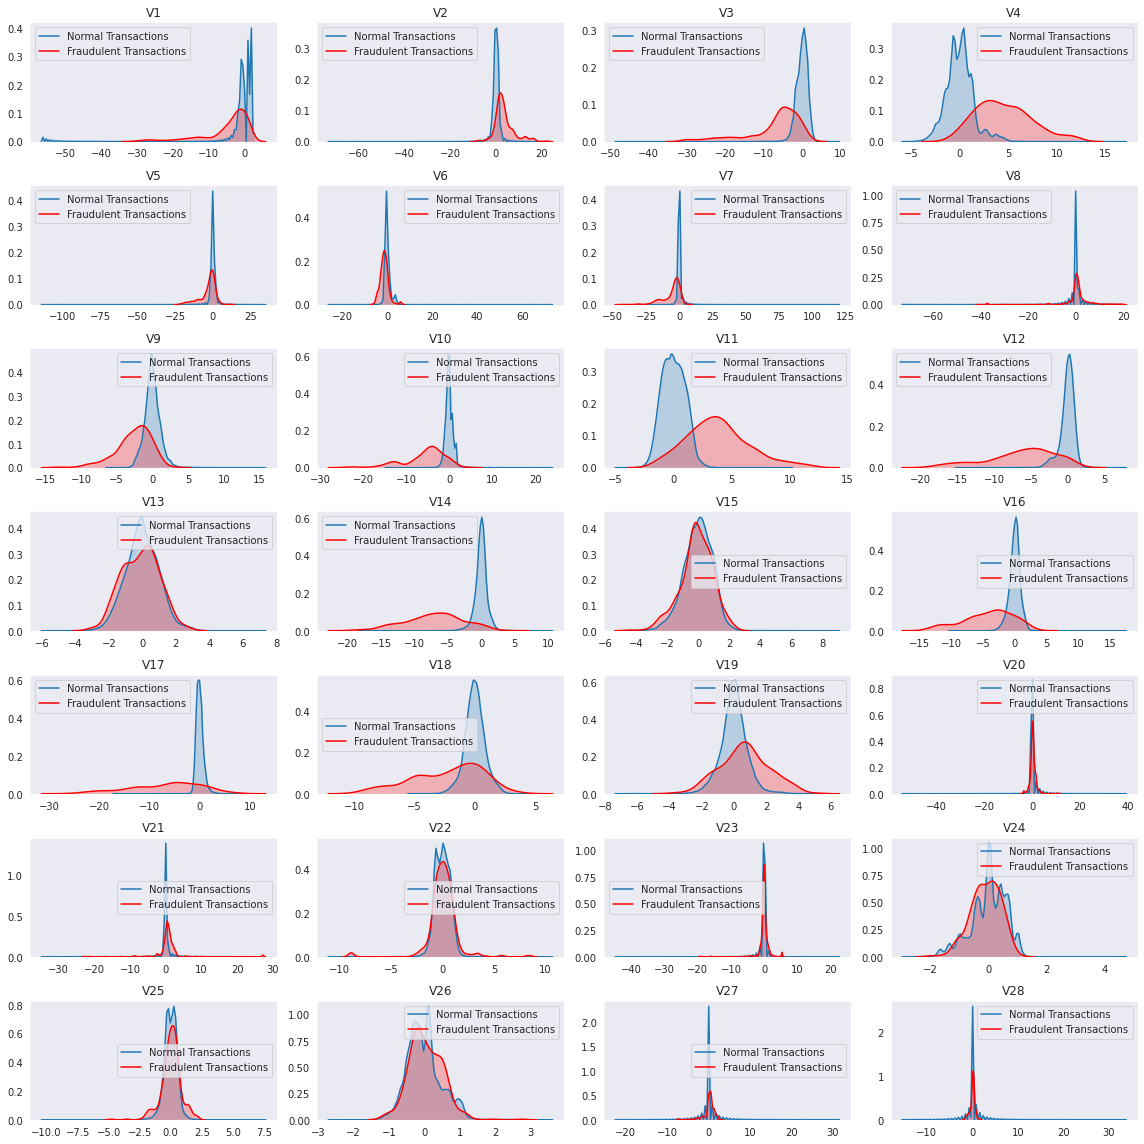

In [8]:
pca_features = df.drop(['Time', 'Class', 'Amount'], axis=1).columns
df_fraud = df[df.Class == 1]
df_normal = df[df.Class == 0]

# PLotting 28 variables
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(16, 16))

i = 0
for col in pca_features:
    i +=1
    plt.subplot(7, 4, i)
    sns.kdeplot(df_normal[col], label = "Normal Transactions", shade=True)
    sns.kdeplot(df_fraud[col], label="Fraudulent Transactions", shade=True, color='r')
    plt.title(col, fontsize=12)

plt.tight_layout()

We have arrived at the end of our exploratory data analysis. This step was great, as it provided elucidation regarding our dataset, the features and the variables. Now we know that:

* The dataset is highly unbalanced;
* There is no missing values, proving the quality of the dataset;
* As PCA is very sensitive to the relative scaling of the original variables, we can assume they are already standardized;
* Columns `Time`and `Amount` are not standardized, and must be before application to the model.

## Preparing the data

In order to feed the Machine Learning Model, we have to prepare our data. The initial steps are:

* Standardize `Time` and `Amount` features;
* Split data into train and test sets;
* Balance the data, so there is no overfitting and have better performance for Class 1 detection.



**Feature Scaling**

In this step, I am going to use the classes StandardScaler and RobustSclaer to standardize the feature `Amount`. 

In [9]:
df_clean = df.copy() # For Standard Scaler
df_clean2 = df_clean.copy() # For Robust Scaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))
df_clean2['rob_amount'] = rob_scaler.fit_transform(df_clean2['Amount'].values.reshape(-1, 1))
df_clean2['rob_time'] = rob_scaler.fit_transform(df_clean2['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)
df_clean2.drop(['Time', 'Amount'], axis=1, inplace=True)

# Check first 5 entries
print(df_clean.head())
print('\n')
print(df_clean2.head())

         V1        V2        V3  ...  Class  std_amount  std_time
0 -1.359807 -0.072781  2.536347  ...      0    0.244964 -1.996583
1  1.191857  0.266151  0.166480  ...      0   -0.342475 -1.996583
2 -1.358354 -1.340163  1.773209  ...      0    1.160686 -1.996562
3 -0.966272 -0.185226  1.792993  ...      0    0.140534 -1.996562
4 -1.158233  0.877737  1.548718  ...      0   -0.073403 -1.996541

[5 rows x 31 columns]


         V1        V2        V3  ...  Class  rob_amount  rob_time
0 -1.359807 -0.072781  2.536347  ...      0    1.783274 -0.994983
1  1.191857  0.266151  0.166480  ...      0   -0.269825 -0.994983
2 -1.358354 -1.340163  1.773209  ...      0    4.983721 -0.994972
3 -0.966272 -0.185226  1.792993  ...      0    1.418291 -0.994972
4 -1.158233  0.877737  1.548718  ...      0    0.670579 -0.994960

[5 rows x 31 columns]


**Split the dataset into Train and Test data**

Now, the main goal is to get 2 different sets of data: one for training the model, and another for checking if the model was effective.

To accomplish this, I use `train_test_split`.

In [10]:
X_std = df_clean.drop('Class', axis=1)
X_rob = df_clean2.drop('Class', axis=1)
y = df['Class']

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, stratify=y)
X_train_rob, X_test_rob, y_train_rob, y_test_rob = train_test_split(X_rob, y, stratify=y)

**Balancing the Data**

Fraudulent transactions are an anomaly: as we have seen before, the vast majority of all transactions are normal ones.

Therefore, if nothing is done, the model would predict the vast majority of the transactions as normal (overfitting), and would not predict accurately the fraudulent ones.

To avoid this situation, the data must be balanced before trainig the model. To perform this, I am going to use UnderSampling: this method focus on the majority class and sample it accordingly. The method used in this project will be `RandomUnderSampler`, that make a random sample of the majority class.

After plotting the chart, we can see that there is no more discrepancies between the two Classes.

In [11]:
print(len(X_train_std))
print(len(X_train_rob))

213605
213605


1    369
0    369
dtype: int64


1    369
0    369
dtype: int64




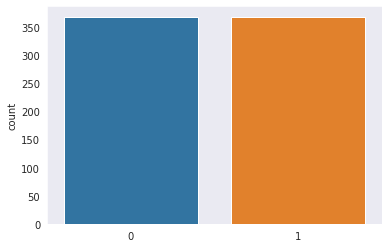

In [12]:
rus = RandomUnderSampler()

X_std_rus, y_std_rus = rus.fit_sample(X_train_std, y_train_std)
X_rob_rus, y_rob_rus = rus.fit_sample(X_train_rob, y_train_rob)

print(pd.Series(y_std_rus).value_counts())
print('\n')
print(pd.Series(y_rob_rus).value_counts())
print('\n')

sns.countplot(y_std_rus);

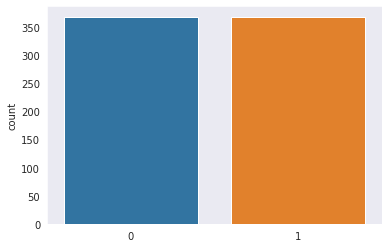

In [13]:
sns.countplot(y_rob_rus);

Now that the data is balanced, we can see its effect on the correlation between variables, using the correlation matrix.

The correlation matrix is a great visual for checking how the different features are correlated to one another.

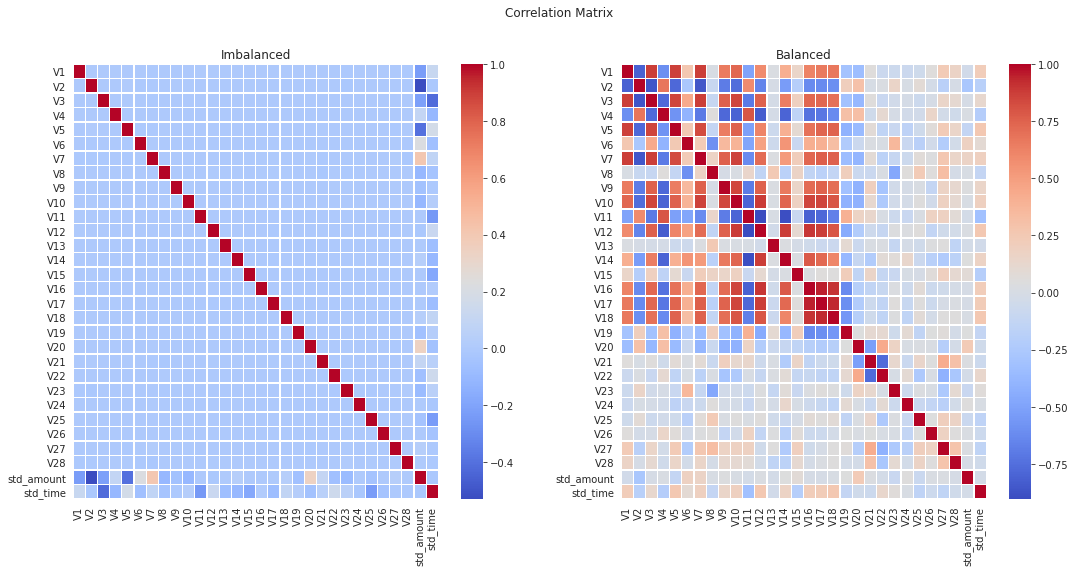

In [14]:
# Plotting correlation matrix for StandardScaler data, Balanced and Imbalanced
corr = X_train_std.corr()
corr_rus = pd.DataFrame(X_std_rus).corr()

fig, ax = plt.subplots(figsize=(18,8), ncols=2)
fig.suptitle("Correlation Matrix")

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.15, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Imbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.15, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

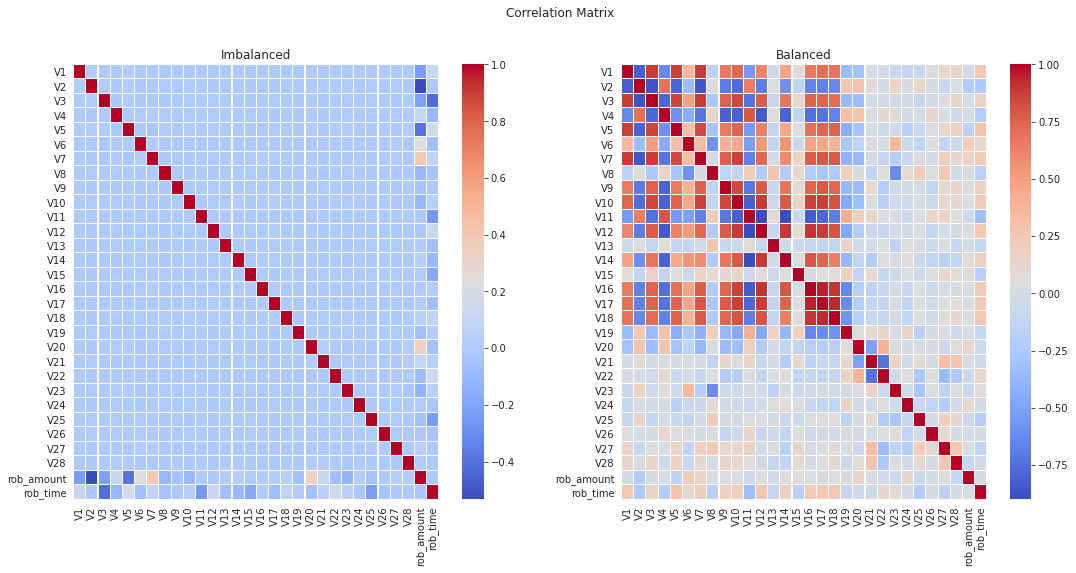

In [15]:
# Plotting correlation matrix for RobustScaler data, Balanced and Imbalanced
corr = X_train_rob.corr()
corr_rus = pd.DataFrame(X_rob_rus).corr()

fig, ax = plt.subplots(figsize=(18,8), ncols=2)
fig.suptitle("Correlation Matrix")

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.15, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Imbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.15, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

## Machine Learning Model

This part of the project is where the Machine Learning model will be chosen. here, we first instantiate a class and train the model.
In this project, I am goping to use both sets of data: RobustScaler and Standard Scaler. 

In [16]:
# instantiate the class
model_std = LogisticRegression()
model_rob = LogisticRegression()

# Train the model
model_std.fit(X_std_rus, y_std_rus)
model_rob.fit(X_rob_rus, y_rob_rus)

# Predict the results - Normal and Probability
y_pred_std = model_std.predict(X_test_std)
y_pred_rob = model_rob.predict(X_test_rob)

y_proba_std = model_std.predict_proba(X_test_std)
y_proba_rob = model_rob.predict_proba(X_test_rob)

With the model trained, I must now verify if it is predicting correctly and effectively the results: I must find a Performance Metric.

As said before, accuracy is not a good choice for this case: the model may have an accuracy of 95%, but may predict only 60% of the frauds, what is totally not acceptable.

In this case, the Confusion Matrix can be used for evaluation of the model. Another great metric is [AUC ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc), that measures the area under ROC curve. Click the link to read more about this metric.



Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9701    0.9847     71079
           1     0.0488    0.8862    0.0925       123

    accuracy                         0.9700     71202
   macro avg     0.5243    0.9281    0.5386     71202
weighted avg     0.9982    0.9700    0.9832     71202

Accuracy: 0.9700

AUC: 0.9281



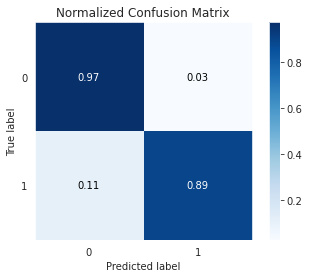

In [17]:
# Standard Scaler
# plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_std, y_pred_std, normalize=True)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test_std, y_pred_std, digits=4))

# Print the Model's Accuracy
print(f"Accuracy: {accuracy_score(y_test_std, y_pred_std):.4f}\n")

# Print AUC
print(f"AUC: {roc_auc_score(y_test_std, y_pred_std):.4f}\n")

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9705    0.9850     71079
           1     0.0511    0.9187    0.0969       123

    accuracy                         0.9704     71202
   macro avg     0.5255    0.9446    0.5409     71202
weighted avg     0.9982    0.9704    0.9834     71202

Accuracy: 0.9704

AUC: 0.9446



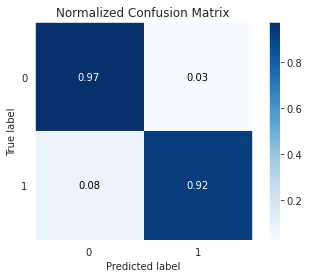

In [18]:
# Robust Scaler
# plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_rob, y_pred_rob, normalize=True)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test_rob, y_pred_rob, digits=4))

# Print the Model's Accuracy
print(f"Accuracy: {accuracy_score(y_test_rob, y_pred_rob):.4f}\n")

# Print AUC
print(f"AUC: {roc_auc_score(y_test_rob, y_pred_rob):.4f}\n")

We see that both models had great accuracy: **both of them had more than 95%**, indicating that over 95% of the predictions were correct.

Also, the precision for both models **was higher than 99.9% for Normal Transactions**. Analyzing the Fraudulent transactions, however, we see that both models had precision of less than 5%, indicating that only 5% of the predictions were right. 

Precision is defined as the amount of True Positives among all predicted positives, according to the equation below:

$$
\frac{True Positives}{True Positives + False Positives}
$$

This meets what was said before: the major goal is to predict frauds even though it is a Normal Transaction, and avoid at all costs false negatives. Considering just fraudulent transactions, both models predicted around 90% correctly. 

### Comparing with another model

Now, let's compare the results with another Machine Learning Model: Decision Tree Classifier.

According to [its documentation](https://scikit-learn.org/stable/modules/tree.html#tree), **Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [19]:
# Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# instantiate the class - in this case, depth is 5.
model_std_DTC = DecisionTreeClassifier(max_depth=5, criterion="entropy")
model_rob_DTC = DecisionTreeClassifier(max_depth=5, criterion="entropy")

# Train the model
model_std_DTC.fit(X_train_std, y_train_std)
model_rob_DTC.fit(X_train_rob, y_train_rob)

# Predict the results
y_DTC_std = model_std.predict(X_test_std)
y_DTC_rob = model_rob.predict(X_test_rob)

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9701    0.9847     71079
           1     0.0488    0.8862    0.0925       123

    accuracy                         0.9700     71202
   macro avg     0.5243    0.9281    0.5386     71202
weighted avg     0.9982    0.9700    0.9832     71202

Accuracy: 0.9700

AUC: 0.9281



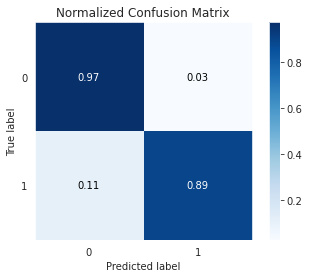

In [20]:
# Standard Scaler
# plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_std, y_DTC_std, normalize=True)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test_std, y_DTC_std, digits=4))

# Print the Model's Accuracy
print(f"Accuracy: {accuracy_score(y_test_std, y_DTC_std):.4f}\n")

# Print AUC
print(f"AUC: {roc_auc_score(y_test_std, y_DTC_std):.4f}\n")

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9705    0.9850     71079
           1     0.0511    0.9187    0.0969       123

    accuracy                         0.9704     71202
   macro avg     0.5255    0.9446    0.5409     71202
weighted avg     0.9982    0.9704    0.9834     71202

Accuracy: 0.9704

AUC: 0.9446



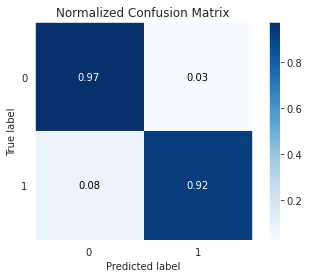

In [21]:
# Robust Scaler
# plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_rob, y_DTC_rob, normalize=True)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test_rob, y_DTC_rob, digits=4))

# Print the Model's Accuracy
print(f"Accuracy: {accuracy_score(y_test_rob, y_DTC_rob):.4f}\n")

# Print AUC
print(f"AUC: {roc_auc_score(y_test_rob, y_DTC_rob):.4f}\n")

We see that the results are very similar, indicating that both models could be chosen for achieving the same overall results.

### Impact of a Machine Learning Model for Fraud Detection

Usually, credit card providers compensate its customers when they say that were victims of a fraud. Therefore, the major advantage of bulding an intelligent algorithm for a situation like this is to avoid cash expenditure to compensate customers.

Using recall score of the model that Used RobustScaler, in example, we can calculate an approximate amount of money that the company would be able to avoid spending detecting it was used in a fraudulent credit card transaction.

The [recall score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) is the ability of the classifier to find all the positive samples; that is, the proportion of True Positives over the amount of Condition positives.

$$
\frac{True Positives}{True Positives + False Negatives}
$$

In [24]:
print(f"The total amount spent in fraudulent transactions, in the dataset, is {df[df.Class == 1].Amount.sum()}\n")

# Considering that the dataset represents 2 days of transactions, 1 month has 15 times more.
monthly_amount_fraud = df[df.Class == 1].Amount.sum()*15
print(f"No ML Detection causes a montlhy spending {monthly_amount_fraud}\n")

# Getting approximation for amount saved with ML Algorithm:
amount_save = monthly_amount_fraud*recall_score(y_test_rob, y_pred_rob)
print(f"With a ML Model, it is possible to save {amount_save:.2f}\n")

The total amount spent in fraudulent transactions, in the dataset, is 60127.97

No ML Detection causes a montlhy spending 901919.55

With a ML Model, it is possible to save 828592.76



We see that the company could save over 800,000 monthly just by applying a simple Machine Learning Algorithm to detect frauds. Considering that no tuning was performed, and other techniques can be applied, we see the importance of Machine Learning in a case like this.

## Conclusion

We can conclude that, even though the dataset is already clean and does not have any missing values, this problem is not a trivial one. 

The dataset used has only data from 2 days, there are not sufficient data for training the model. We see that the precision of both Logistic Regression models for fraudulent transactions are below 10%. The more data we use to train the model, the more accurate it becomes; in this situation, it provides fewer problems for customers that just want to buy something and the model incorrectly predicts the transaction as a fraud.

There are still many optimizations for these models, such as hyperparameter tuning; this is why many financial companies have entire divisions only focused on crating and avaliating Machine Learning models, adjusting them according to the expansion of the database.



